# Debugging new methods for Propagator class

Now we pass a contour dictionary containing Zs, dZds and ds

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(symmetric=True)


In [3]:
b = 1.25
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - (x/b)**2, 0]
    return np.piecewise(x, conds, funcs)

f0 = quadratic_piecewise

In [4]:
# A.plot_field_1d(f0)

In [5]:
Propagator_Class = A.propagator()

In [6]:
contour = A.real_contour(0.00001, A.Z_evanescent, 120)


In [7]:
P = Propagator_Class(contour, f0=f0)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

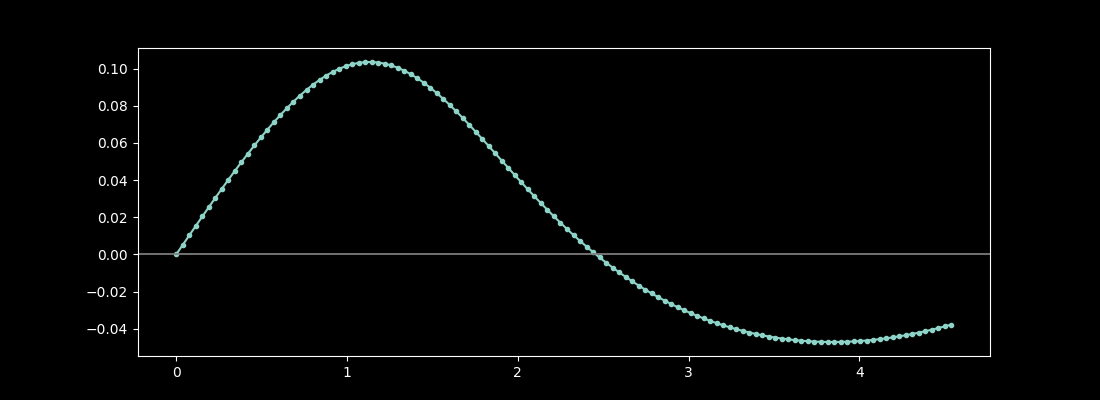

In [9]:
P.plot_transform(xs=P.Zs)

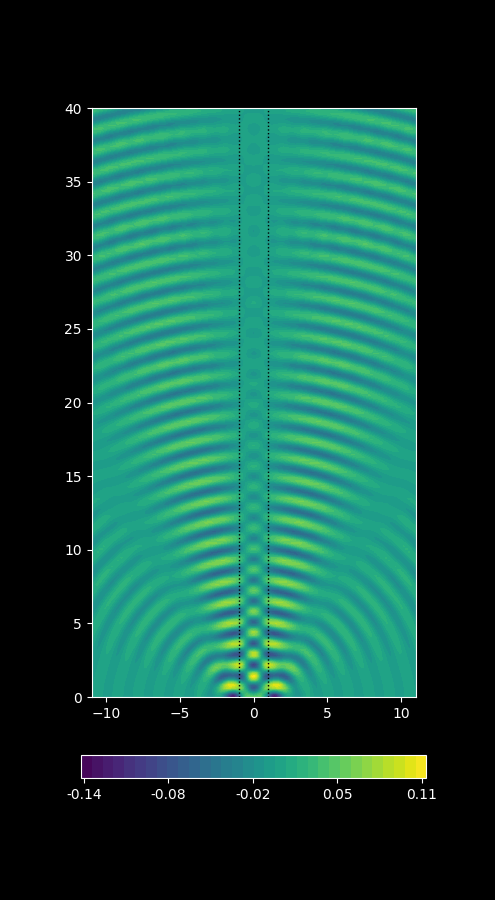

In [13]:
A.plot_field_2d(P.propagate,'full', 'trapezoid', xs=np.linspace(-11, 11, 1000), zmax=40, zref=200, maxdim=9);

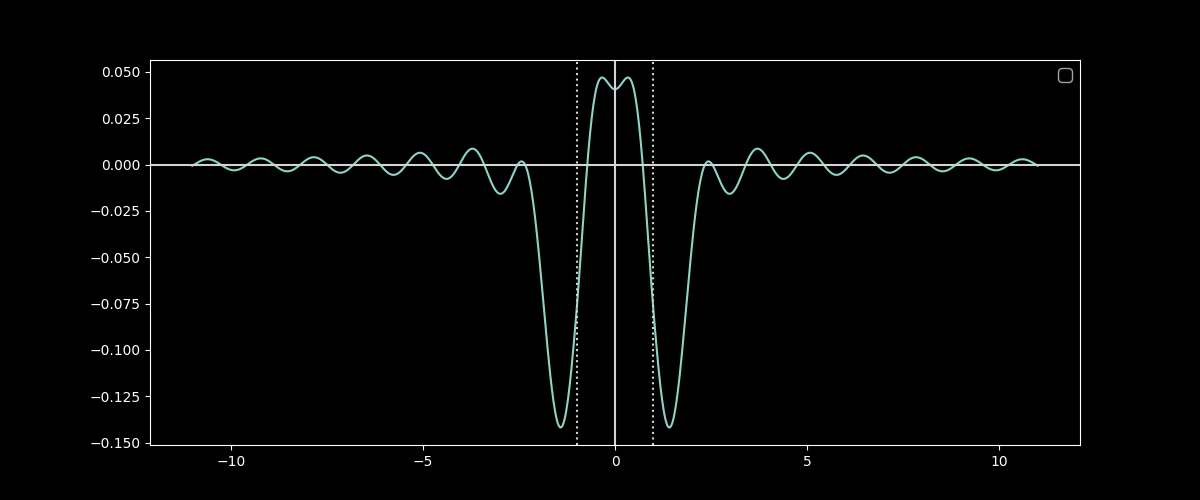

In [14]:
A.plot_field_1d(P.slice_propagate, 0, 'z', xs=np.linspace(-11, 11, 1000),);